## Read the codebook

When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So before you start coding, you'll need to get familiar with the NSFG codebook, which describes every variable.

Here is the documentation from the NSFG codebook for "BIRTHWGT_OZ1":

![birthwgt_oz1 codebook](https://i.imgur.com/ioguHfP.png)

How many respondents refused to answer this question?

1.

## Exploring the NSFG data

To get the number of rows and columns in a DataFrame, you can read its `shape` attribute.

To get the column names, you can read the `columns` attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called `nsfg`.

Instructions

1. Calculate the number of rows and columns in the DataFrame `nsfg`.
2. Display the names of the columns in `nsfg`.
3. Select the column `'birthwgt_oz1'` and assign it to a new variable called `ounces`.
4. Display the first 5 elements of `ounces`.

In [2]:
import pandas as pd 
nsfg = pd.read_hdf('National_Survey_of_Family_Growth_NSFG.hdf5')

In [7]:
# Display the number of rows and columns
display(nsfg.shape)

# Display the names of the columns
display(nsfg.columns)

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
display(ounces.head())

(9358, 10)

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

## Validate a variable

In the NSFG dataset, the variable `'outcome'` encodes the outcome of each pregnancy as shown below:

```
value     label
---------------------------
1         Live birth
2         Induced abortion
3         Stillbirth
4         Miscarriage
5         Ectopic pregnancy
6         Current pregnancy
```

The `nsfg` DataFrame has been pre-loaded for you. Explore it and use the methods Allen showed you in the video to answer the following question: How many pregnancies in this dataset ended with a live birth?

In [12]:
outcome = nsfg['outcome']

outcome.value_counts().sort_index()

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

## Clean a variable

In the NSFG dataset, the variable `'nbrnaliv'` records the number of babies born alive at the end of a pregnancy.

If you use `.value_counts()` to view the responses, you'll see that the value `8` appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with `np.nan`. Recall from the video how Allen replaced the values `98` and `99` in the `ounces` column using the `.replace()` method:

```
ounces.replace([98, 99], np.nan, inplace=True)
```

Instructions

1. In the `'nbrnaliv'` column, replace the value `8`, in place, with the special value `NaN`.
2. Confirm that the value `8` no longer appears in this column by printing the values and their frequencies.

In [16]:
import numpy as np

In [18]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


## Compute a variable

For each pregnancy in the NSFG dataset, the variable `'agecon'` encodes the respondent's age at conception, and `'agepreg'` the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value `2575` means that the respondent's age was `25.75`.

Instructions

1. Select `'agecon'` and `'agepreg'`, divide them by `100`, and assign them to the local variables `agecon` and `agepreg`.
2. Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, `agepreg` will be larger than `agecon`.
3. Use `.describe()` to compute the mean duration and other summary statistics.

In [24]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

## Make a histogram

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable `'agecon'` that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the `bins` parameter that you saw in the video, and also a new parameter - `histtype` - which you can read more about [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) in the `matplotlib` documentation. Learning how to read documentation is an essential skill. If you want to learn more about `matplotlib`, you can check out [DataCamp's Introduction to Matplotlib](https://www.datacamp.com/courses/introduction-to-matplotlib) course.

Instructions

1. Plot a histogram of `agecon` with 20 `bins`.
2. Adapt your code to make an unfilled histogram by setting the parameter `histtype` to be `'step'`.

In [25]:
import matplotlib.pyplot as plt

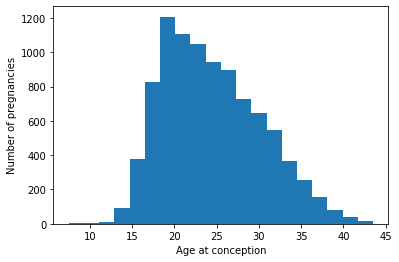

In [26]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

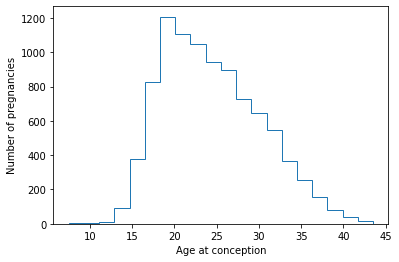

In [27]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

## Compute birth weight

Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, `resample_rows_weighted`, that takes the NSFG data and resamples it using the sampling weights in `wgt2013_2015`. The result is a sample that is representative of the U.S. population.

Then I extract `birthwgt_lb1` and `birthwgt_oz1`, replace special codes with `NaN`, and compute total birth weight in pounds, `birth_weight`.

```
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16
```

Instructions

1. Make a Boolean Series called `full_term` that is true for babies with `'prglngth'` greater than or equal to 37 weeks.
2. Use `full_term` and `birth_weight` to select birth weight in pounds for full-term babies. Store the result in `full_term_weight`.
3. Compute the mean weight of full-term babies.

In [30]:
def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    np.random.seed(seed)
    weights = df[column] / sum(df[column])
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [31]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
full_term_weight.mean()

7.392597951914515

## Filter

In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

Instructions

1. Use the variable `'nbrnaliv'` to make a Boolean Series that is `True` for single births (where `'nbrnaliv'` equals `1`) and `False` otherwise.
2. Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
3. For comparison, select multiple, full-term babies and compute their mean birth weight.

In [33]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print(f'Single full-term mean: {single_full_term_weight.mean()}')

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print(f'Multiple full-term mean: {mult_full_term_weight.mean()}')

Single full-term mean: 7.40297320308299
Multiple full-term mean: 5.784722222222222
